In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [26]:
df= pd.read_csv(r"C:\Users\HP\.spyder-py3\Downloads\team_data.csv")

### EDA

In [20]:
df.head()

,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Argentina,24,28.4,57.4,7,77,690,7.7,15,8,...,100,115,23,5,2,1,357,83,90,48.0
1,Australia,20,28.7,37.8,4,44,360,4.0,3,3,...,52,34,1,0,0,0,200,72,72,50.0
2,Belgium,20,30.6,57.0,3,33,270,3.0,1,1,...,30,35,3,0,1,0,132,33,28,54.1
3,Brazil,26,28.5,56.2,5,55,480,5.3,8,6,...,63,74,8,1,0,0,271,43,56,43.4
4,Cameroon,22,28.0,41.7,3,33,270,3.0,4,4,...,32,38,2,0,0,0,142,42,36,53.8


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 189 entries, team to aerials_won_pct
dtypes: float64(59), int64(129), object(1)
memory usage: 47.4+ KB


In [22]:
df.shape

(32, 189)

In [23]:
df.describe()


,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,goals_pens,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.00000,32.000000
mean,21.250000,28.062500,49.443750,4.000000,44.000000,369.375000,4.100000,5.312500,3.781250,4.781250,...,49.968750,47.562500,7.937500,0.593750,0.718750,0.062500,202.875000,54.15625,54.15625,50.156250
std,1.951013,1.166674,9.457066,1.344043,14.784473,135.763967,1.506973,4.130434,3.220242,3.571702,...,19.924834,21.409882,5.161505,0.979117,0.888434,0.245935,75.936625,17.98406,17.55748,4.599364
min,18.000000,25.400000,31.300000,3.000000,33.000000,270.000000,3.000000,1.000000,0.000000,0.000000,...,24.000000,23.000000,1.000000,0.000000,0.000000,0.000000,132.000000,30.00000,21.00000,36.700000
25%,20.000000,27.475000,42.750000,3.000000,33.000000,270.000000,3.000000,2.750000,1.000000,2.000000,...,34.750000,34.750000,4.000000,0.000000,0.000000,0.000000,146.750000,42.00000,40.50000,47.825000
50%,21.000000,28.100000,50.150000,3.500000,38.500000,315.000000,3.500000,4.500000,3.000000,4.000000,...,46.500000,38.000000,7.000000,0.000000,1.000000,0.000000,173.000000,49.00000,52.00000,50.250000
75%,22.000000,28.725000,54.775000,4.250000,46.750000,405.000000,4.475000,6.500000,5.000000,6.250000,...,55.250000,51.750000,11.000000,1.000000,1.000000,0.000000,225.500000,67.00000,63.75000,53.150000
max,26.000000,30.600000,75.800000,7.000000,77.000000,690.000000,7.700000,16.000000,12.000000,14.000000,...,100.000000,115.000000,23.000000,5.000000,4.000000,1.000000,409.000000,106.00000,90.00000,58.800000


In [24]:
df.duplicated()  #we dont have any duplicate values 

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
dtype: bool

In [25]:
df.isnull().sum() #no null values

team               0
players_used       0
avg_age            0
possession         0
games              0
                  ..
own_goals          0
ball_recoveries    0
aerials_won        0
aerials_lost       0
aerials_won_pct    0
Length: 189, dtype: int64

### Data   Visualisation


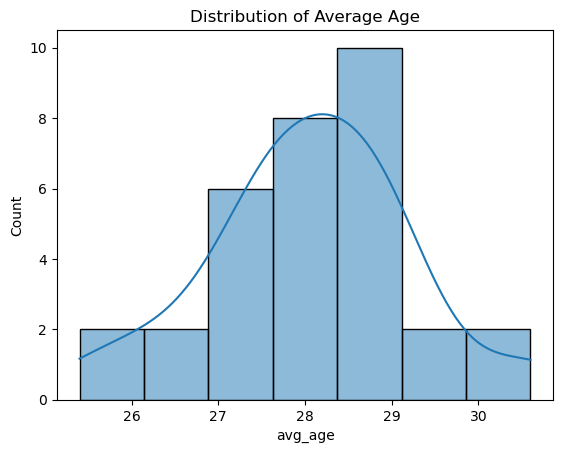

In [28]:
sns.histplot(df['avg_age'], kde=True)
plt.title('Distribution of Average Age')
plt.show()

In [32]:
df_numeric= df.drop('team',axis=1) #dropping non numeric column here, we are not doing encoding because team column is not that much relevant for clustering

In [33]:
df_numeric

,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,goals_pens,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,24,28.4,57.4,7,77,690,7.7,15,8,11,...,100,115,23,5,2,1,357,83,90,48.0
1,20,28.7,37.8,4,44,360,4.0,3,3,3,...,52,34,1,0,0,0,200,72,72,50.0
2,20,30.6,57.0,3,33,270,3.0,1,1,1,...,30,35,3,0,1,0,132,33,28,54.1
3,26,28.5,56.2,5,55,480,5.3,8,6,7,...,63,74,8,1,0,0,271,43,56,43.4
4,22,28.0,41.7,3,33,270,3.0,4,4,4,...,32,38,2,0,0,0,142,42,36,53.8
5,19,28.2,52.0,3,33,270,3.0,1,1,1,...,33,37,8,0,0,0,145,30,21,58.8
6,22,30.6,31.3,3,33,270,3.0,3,1,3,...,24,37,13,0,1,0,142,38,30,55.9
7,21,29.2,54.3,7,77,690,7.7,8,8,8,...,90,90,11,0,1,0,409,87,87,50.0
8,20,27.5,60.0,3,33,270,3.0,1,1,1,...,28,23,5,0,0,0,171,51,48,51.5
9,18,25.8,53.3,3,33,270,3.0,4,2,3,...,50,37,8,1,1,0,135,50,49,50.5


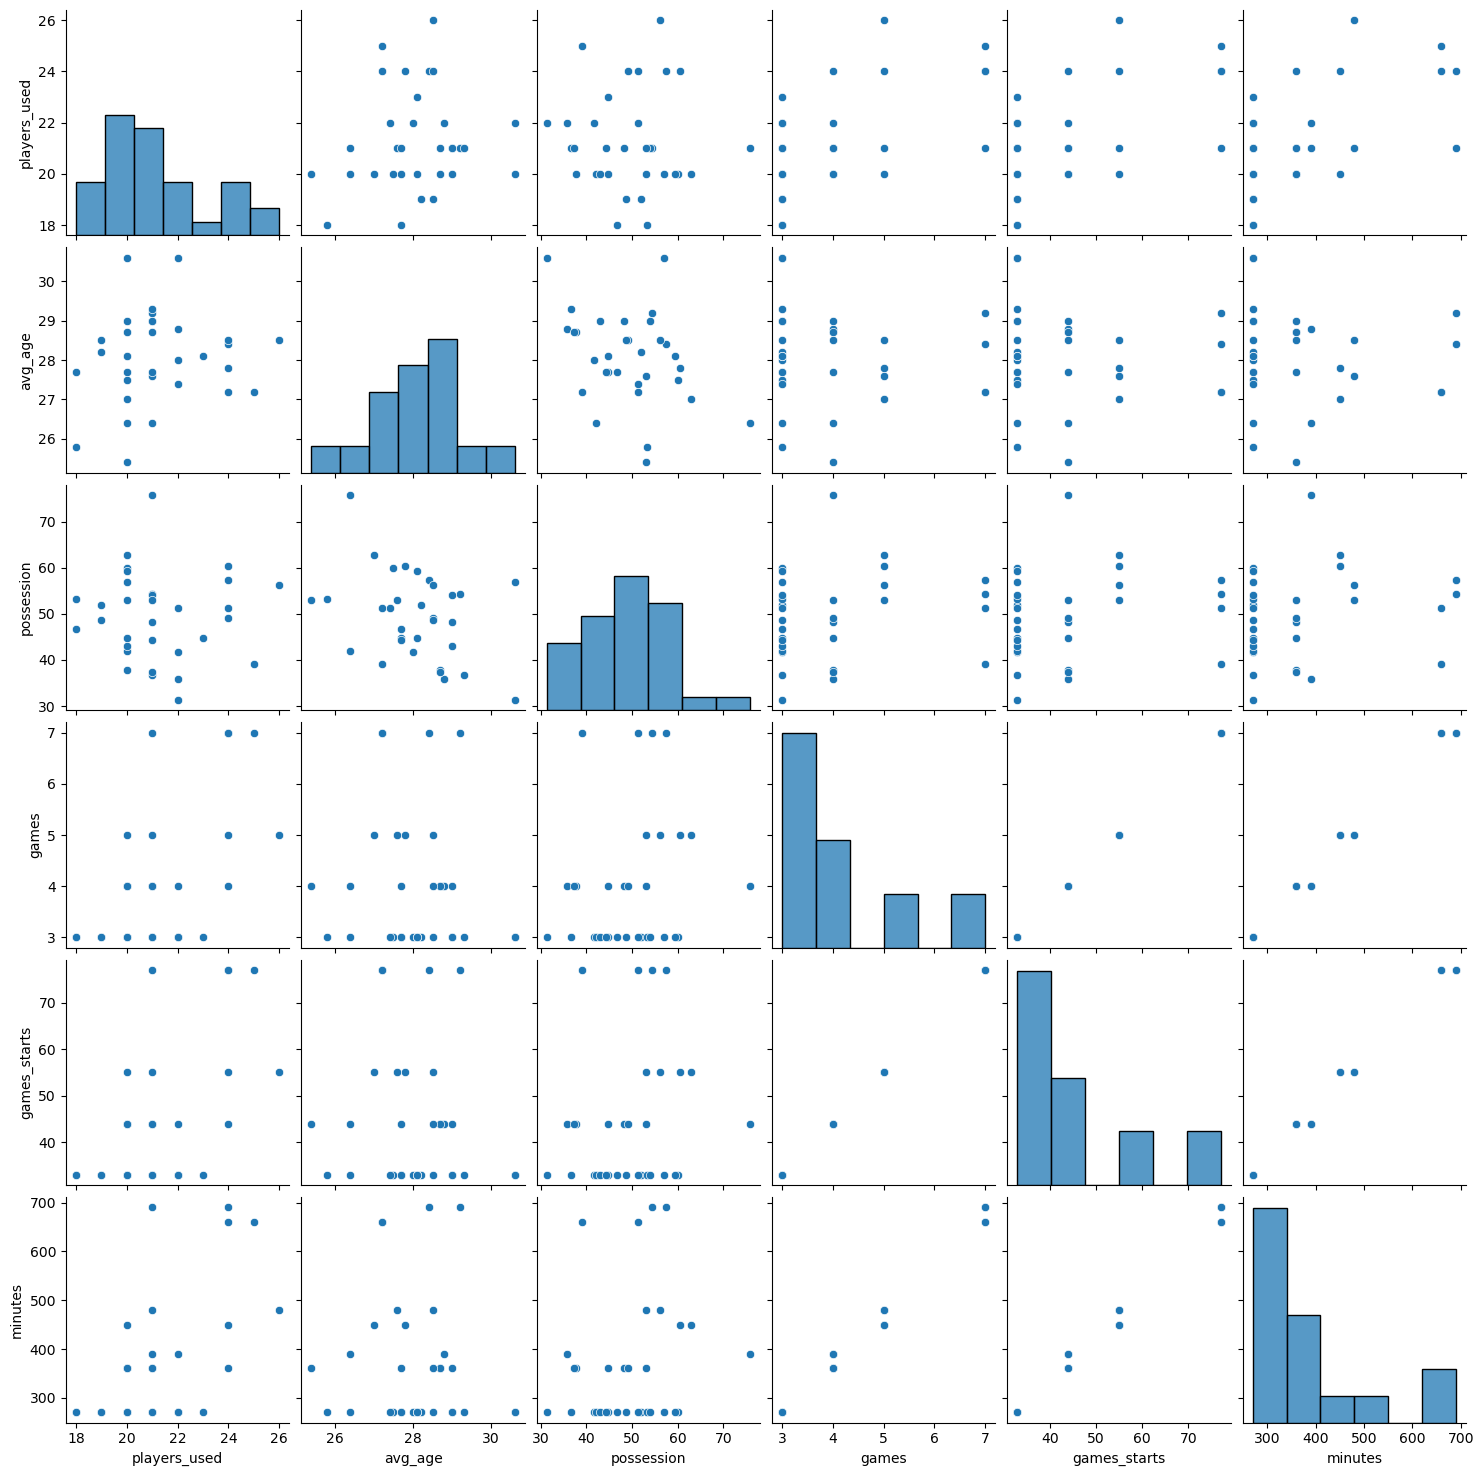

In [39]:
sns.pairplot(df_numeric[df_numeric.columns[:6]])
plt.show()


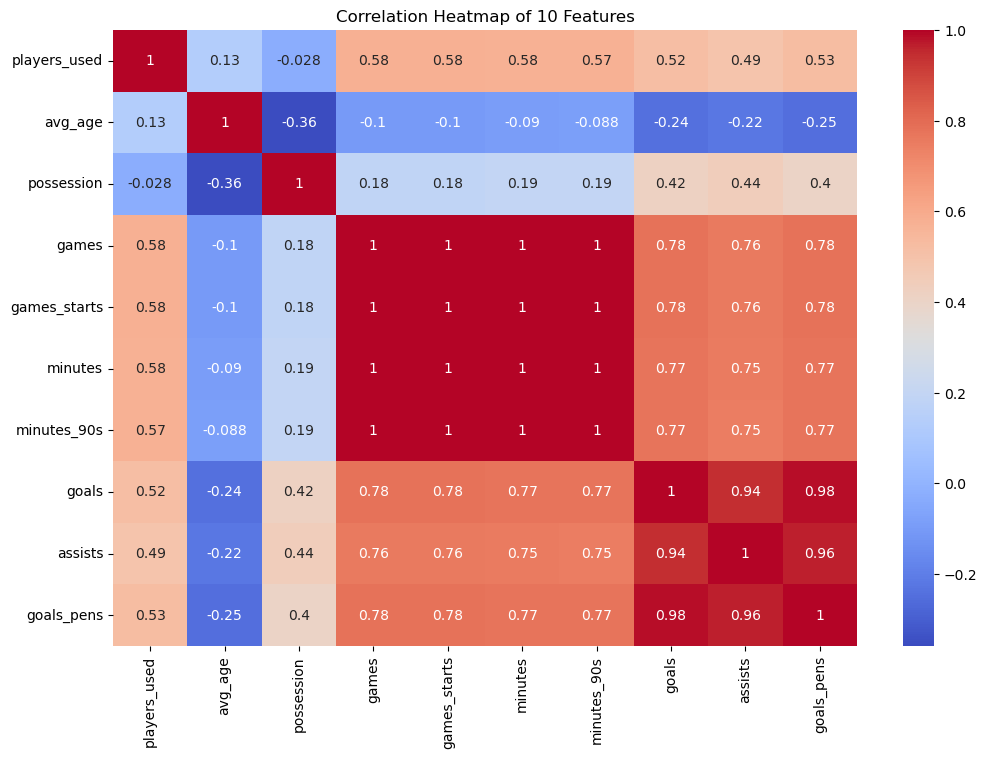

In [58]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[df_numeric.columns[:10]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of 10 Features')
plt.show()

In [60]:
df_numeric

,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,goals_pens,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,24,28.4,57.4,7,77,690,7.7,15,8,11,...,100,115,23,5,2,1,357,83,90,48.0
1,20,28.7,37.8,4,44,360,4.0,3,3,3,...,52,34,1,0,0,0,200,72,72,50.0
2,20,30.6,57.0,3,33,270,3.0,1,1,1,...,30,35,3,0,1,0,132,33,28,54.1
3,26,28.5,56.2,5,55,480,5.3,8,6,7,...,63,74,8,1,0,0,271,43,56,43.4
4,22,28.0,41.7,3,33,270,3.0,4,4,4,...,32,38,2,0,0,0,142,42,36,53.8
5,19,28.2,52.0,3,33,270,3.0,1,1,1,...,33,37,8,0,0,0,145,30,21,58.8
6,22,30.6,31.3,3,33,270,3.0,3,1,3,...,24,37,13,0,1,0,142,38,30,55.9
7,21,29.2,54.3,7,77,690,7.7,8,8,8,...,90,90,11,0,1,0,409,87,87,50.0
8,20,27.5,60.0,3,33,270,3.0,1,1,1,...,28,23,5,0,0,0,171,51,48,51.5
9,18,25.8,53.3,3,33,270,3.0,4,2,3,...,50,37,8,1,1,0,135,50,49,50.5


### Data Cleaning and Preprocessing

In [66]:
#our data does not contain any null values
#it also does not have any duplicates
#all data points are numeric as we have already dropped non numeric column

#so it means are fully cleaned and now we have to do scaling of our data...

scaler= StandardScaler()
df_numeric_scaled= scaler.fit_transform(df_numeric)


In [68]:
df_numeric_scaled  #we are getting our scaled values in array form 

array([[ 1.43207802,  0.29391264,  0.85476388, ...,  1.6295141 ,
         2.07417496, -0.47631629],
       [-0.65094455,  0.55516833, -1.25092311, ...,  1.00807427,
         1.03256661, -0.03451567],
       [-0.65094455,  2.20978766,  0.81179068, ..., -1.1952124 ,
        -1.51358713,  0.87117559],
       ...,
       [-0.65094455, -2.3186442 ,  0.38205864, ..., -0.0653218 ,
        -0.06690887, -0.03451567],
       [-1.1717002 ,  0.38099787, -0.0799033 , ..., -0.0653218 ,
        -0.41411165,  0.62818525],
       [-1.69245584, -0.31568395, -0.29476932, ..., -0.68676163,
        -0.76131444,  0.09802451]])

In [92]:
scaled_data= pd.DataFrame(df_numeric_scaled,index=None) #converting aaray into data frame
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.432078,0.293913,0.854764,2.267787,2.267787,2.399424,2.42712,2.382924,1.331035,1.768976,...,2.551178,3.200231,2.964933,4.572238,1.465220,3.872983,2.062130,1.629514,2.074175,-0.476316
1,-0.650945,0.555168,-1.250923,0.000000,0.000000,-0.070159,-0.06742,-0.568827,-0.246488,-0.506692,...,0.103577,-0.643605,-1.365592,-0.616117,-0.821953,-0.258199,-0.038466,1.008074,1.032567,-0.034516
2,-0.650945,2.209788,0.811791,-0.755929,-0.755929,-0.743681,-0.74162,-1.060786,-0.877497,-1.075609,...,-1.018240,-0.596151,-0.971908,-0.616117,0.321634,-0.258199,-0.948279,-1.195212,-1.513587,0.871176
3,2.473589,0.380998,0.725844,0.755929,0.755929,0.827871,0.80904,0.661069,0.700026,0.631142,...,0.664486,1.254585,0.012303,0.421554,-0.821953,-0.258199,0.911485,-0.630267,0.106693,-1.492458
4,0.390567,-0.054428,-0.831934,-0.755929,-0.755929,-0.743681,-0.74162,-0.322848,0.069017,-0.222233,...,-0.916257,-0.453786,-1.168750,-0.616117,-0.821953,-0.258199,-0.814483,-0.686762,-1.050650,0.804905
5,-1.171700,0.119742,0.274626,-0.755929,-0.755929,-0.743681,-0.74162,-1.060786,-0.877497,-1.075609,...,-0.865265,-0.501241,0.012303,-0.616117,-0.821953,-0.258199,-0.774344,-1.364696,-1.918657,1.909407
6,0.390567,2.209788,-1.949238,-0.755929,-0.755929,-0.743681,-0.74162,-0.568827,-0.877497,-0.506692,...,-1.324191,-0.501241,0.996513,-0.616117,0.321634,-0.258199,-0.814483,-0.912740,-1.397853,1.268796
7,-0.130189,0.990594,0.521722,2.267787,2.267787,2.399424,2.42712,0.661069,1.331035,0.915601,...,2.041261,2.013862,0.602829,-0.616117,0.321634,-0.258199,2.757868,1.855492,1.900574,-0.034516
8,-0.650945,-0.489854,1.134090,-0.755929,-0.755929,-0.743681,-0.74162,-1.060786,-0.877497,-1.075609,...,-1.120224,-1.165608,-0.578223,-0.616117,-0.821953,-0.258199,-0.426474,-0.178311,-0.356245,0.296835
9,-1.692456,-1.970303,0.414289,-0.755929,-0.755929,-0.743681,-0.74162,-0.322848,-0.561992,-0.506692,...,0.001593,-0.501241,0.012303,0.421554,0.321634,-0.258199,-0.908140,-0.234805,-0.298377,0.075934


### Feature Engineering (PCA)


In [95]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_data)

### Model training and evaluating

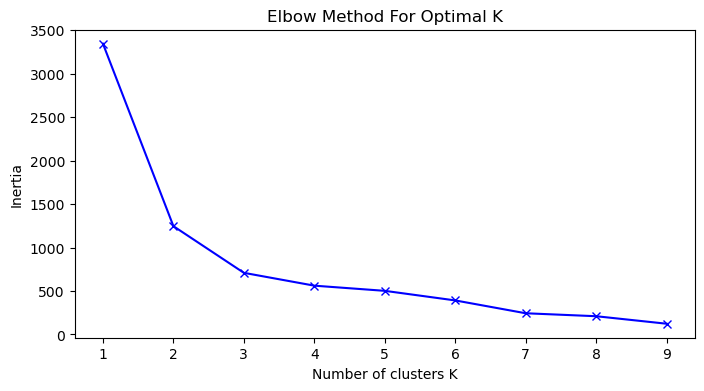

In [96]:
# Use Elbow method to find optimal K value
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()


#from this graph we can get after k=3 our inertia got stablize and hence we will consider 3 as k value for k mean clustering

In [110]:
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42)
clusters = kmeans.fit_predict(pca_features)

In [111]:


# Silhouette Score to evaluate clustering quality
sil_score = silhouette_score(pca_features, clusters)
print(f"Silhouette Score for k={k_opt}: {sil_score:.3f}")


#score more than 0.5 is considered as good clusterirng , 0<score<0.5 is considered as weak or overlapped clustering..

Silhouette Score for k=3: 0.593


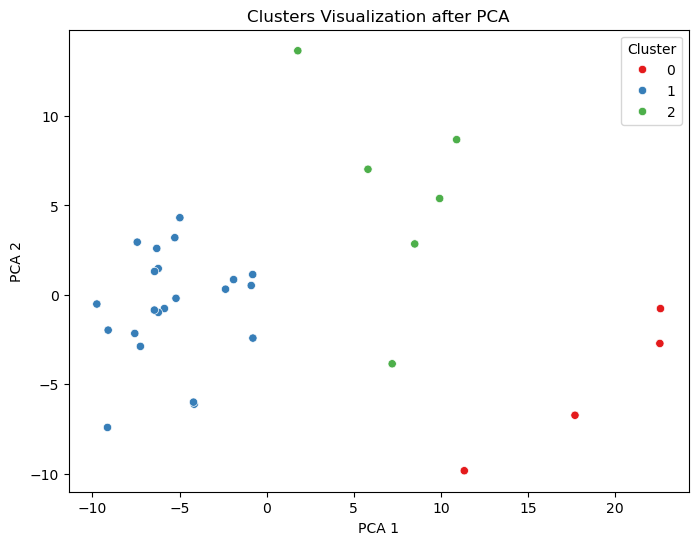

In [118]:


# Visualize clusters on PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='Set1')
plt.title('Clusters Visualization after PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()



In [120]:
df['Cluster'] = clusters

In [121]:
df.head()

,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,...,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,Cluster
0,Argentina,24,28.4,57.4,7,77,690,7.7,15,8,...,115,23,5,2,1,357,83,90,48.0,0
1,Australia,20,28.7,37.8,4,44,360,4.0,3,3,...,34,1,0,0,0,200,72,72,50.0,1
2,Belgium,20,30.6,57.0,3,33,270,3.0,1,1,...,35,3,0,1,0,132,33,28,54.1,1
3,Brazil,26,28.5,56.2,5,55,480,5.3,8,6,...,74,8,1,0,0,271,43,56,43.4,2
4,Cameroon,22,28.0,41.7,3,33,270,3.0,4,4,...,38,2,0,0,0,142,42,36,53.8,1
